In [133]:
####import packages

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['green','orange','blue'])

import seaborn as sns
from sklearn.metrics import accuracy_score

from scipy.stats import mode

In [131]:
# pip install -U scikit-learn scipy matplotlib
#pip install scikit-learn
#pip install seaborn


In [32]:
###exploring iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1234)

In [75]:
print(X_train.shape)
print(X_train[0])
print("##################")
print(y_train.shape)
print(y_train)

(120, 4)
[5.1 2.5 3.  1.1]
##################
(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


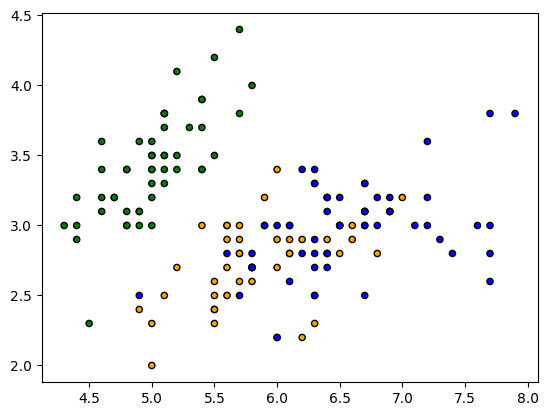

In [43]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, cmap= cmap, edgecolors='k', s= 20)
plt.show()

In [64]:
# a = [1,1,1,2,2,3,4,5,6]
# from collections import Counter
# most_common = Counter(a).most_common(1)
# print(most_common[0][0])

In [76]:
####knn class from scratch ####
import numpy as np
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self,x):
        #compute the distances
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]
        # get k-nearest ssample, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #majority vote, most common class
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



#checking accuracy
clf = KNN(k=5)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions == y_test)/len(y_test)
print(acc)


0.9666666666666667


In [77]:
###### another way to write knn using iphone buyers dataset

In [80]:
dataset = pd.read_csv("iphone_purchase_records.csv")

In [81]:
dataset.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [82]:
### drop gender problem to reduce unethical bias
dataset = dataset.drop('Gender', axis =1)

In [83]:
dataset.head(10)

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [85]:
X = dataset.drop('Purchase Iphone', axis =1)
Y = dataset['Purchase Iphone']

In [86]:
print(X)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [87]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


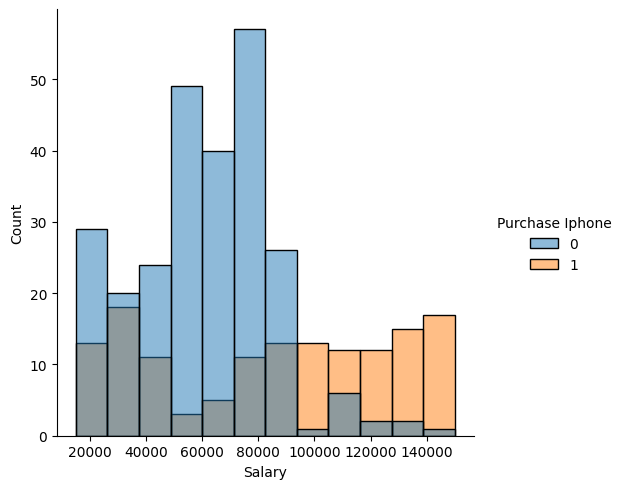

In [88]:
sns.displot(dataset, x = 'Salary', hue = 'Purchase Iphone')

In [95]:
###define-euclidean-distance
def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum(pt1 - pt2)**2)
    return distance

##let's test it

a = np.array([3,4])
b = np.array([5,6])

print(euclidean_distance(a, b))

4.0


In [112]:
## knn algorithm

def KNN(X_train, X_test, Y_train, Y_test, k_val):
    ##### the predictions which we will make will be stored in y_hat
    y_hat = []
    ####now we need to iterate through every point in test data and we need to classify which class it belongs to
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))

        distance_data = pd.DataFrame(data = distances, columns = ['distance'], index = Y_train.index)

        k_neighbours_list = distance_data.sort_values(by = ['distance'], axis = 0)[:k_val]

        labels = Y_train.loc[k_neighbours_list.index]
        # voting = mode(labels)
        voting = mode(labels).mode

        y_hat.append(voting)
        
    return y_hat
    


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .3, random_state = 42)

y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val = 5)

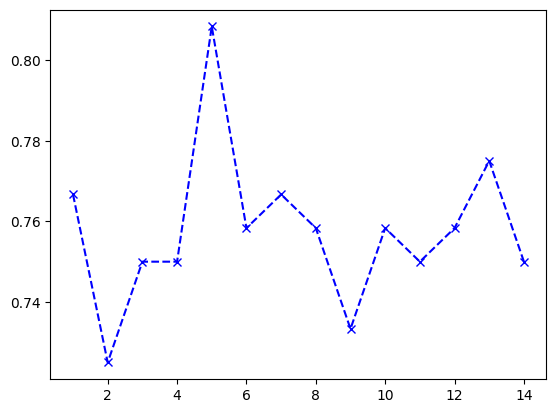

In [121]:
accuracy_vals = []
for i in range(1,15):
    y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val = i)
    accuracy_vals.append(accuracy_score(Y_test, y_hat_test))

plt.plot(range(1,15),accuracy_vals, color = 'blue', marker = 'x', linestyle ='dashed')

0.7166666666666667


Text(0.5, 1.0, 'KNN results')

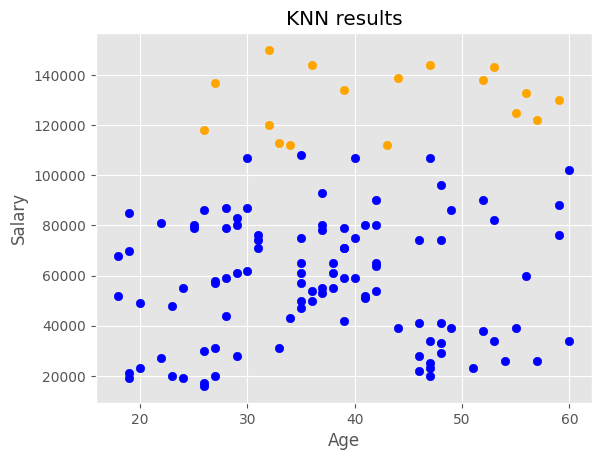

In [136]:
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val = i)
print(accuracy_score(Y_test, y_hat_test))

for i in range(len(y_hat_test)):
    if (y_hat_test[i] == 0):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'], color = 'blue')
    if (y_hat_test[i] == 1):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'], color = 'orange')
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN results')

<Axes: xlabel='Age', ylabel='Salary'>

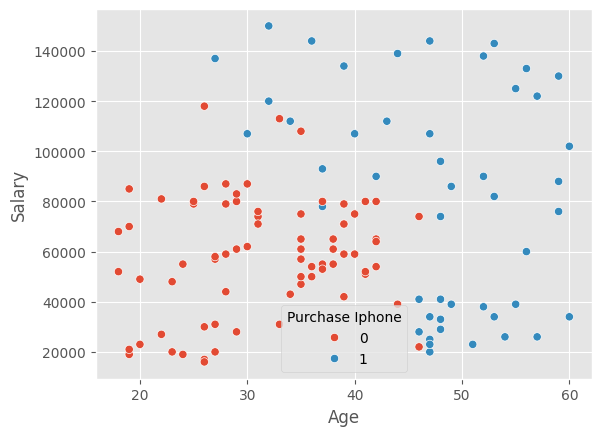

In [137]:
####visualise algorithm result and actual test data

sns.scatterplot(data=dataset,x = X_test['Age'], y=X_test['Salary'], hue = 'Purchase Iphone')